# Statistical Inference of Cosmological Models


The structures in universe can show a huge difference under different cosmological models.

<img src="CLUES_CDM_WDM.jpg" width="70%">

To simulate the structures in our universe, it requires **thousands of parameters**.<br>
But in most of time, only **a dozen of features** can be collected in astronomical observations.

Here, **Bayesian statistics** plays a powerful role to recover the posterior probability of complex cosmological models from a small set of constraint features and provides insights on which model best described our universe.


## Bayesian Framework 

In Bayesian statistics, the **posterior probability** is the probability of a model $M(\theta)$ given a set of random events $X$.

$P(\theta~|~X) = \frac{P(X|\theta)P(\theta)}{P(X)}$,

where $P(X~|~\theta)$ is the likelihood of the data $X$ occur under the model parameter $\theta$ <br>
(*What is the chance we obtain this set of data if the model is true?*)

$P(\theta)$ is the prior knowledge of the model<br>
(*To predict the number of incoming customer as a function of time? Excluding the weekly off-days and considering the length of working hours are the prior knowledge of model*)

$P(X)$ is the prior knowledge of the data<br>
(*In a rating system, the distribution of how many rating each user provides is the prior knowledge of data*)

Therefore, one can obtain the posterior probability by coputing the **likelihood function**.

The dimension of parameter space for the likelihood function is $DoF~ of~ model~ M(\theta)~  \times ~ num ~of~ features~ of~ data~ X$.

In this case of investigating cosmological models, I am going to explore the parameter space with over thousands of degrees of freedom. This requires a technique called **Monte-Carlo method**.


## Monte-Carlo Method

The Monte-Carlo method ramdomly selects points in the high-dimensional parameter space.<br>
If the number of points is sufficiently large, the likelihood distribution in the parameter space can be recovered.

The following code demonstrates two examples of structures in universe from my Monte-Carlo simulation:

### Calculate structure abundance ###
### Simulate structure properties ###
### Visualize simulations ###


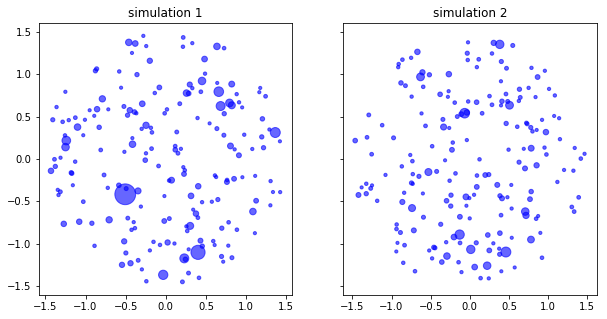

In [37]:
import numpy as np
import sub_tool as st

### Setting cosmological parameter ###
Re_arc = 0.75 
kap_tot= 3.6 
ml, mh = 6,9 
f_low,f_hi = 0.,2.
f_sub,m_c = 0.01,0. 
sigC = 4.9e10
Re = 0.0034
z_l,z_s = 0.34,3.62
### ---------------------- ###

light_cone = [z_l,z_s,Re,f_low,f_hi]
print('### Calculate structure abundance ###')
m_sub,prob_sub,Mtot,Nsub = st.sub_pdf(ml,mh,f_sub,kap_tot,m_c,light_cone,Re_arc,sigC)
submf_out = [m_sub,prob_sub,Mtot,Nsub]

print('### Simulate structure properties ###')

M_list,X_list,Y_list = [],[],[]
for i in range(2):
    M,X,Y,rvir,c = st.create_subs(submf_out,light_cone,Re_arc)
    M_list.append(M)
    X_list.append(X)
    Y_list.append(Y)

### ---------------------- ###
    
import matplotlib.pyplot as plt
import matplotlib.patches as patches
print('### Visualize simulations ###')

plt.clf()
fig, axs = plt.subplots(1,2, figsize=(10, 5), sharey=True)
axs[0].scatter(X_list[0],Y_list[0],marker='o',color='b',alpha=0.6,s=M_list[0]/1e5)
axs[1].scatter(X_list[1],Y_list[1],marker='o',color='b',alpha=0.6,s=M_list[1]/1e5)
axs[0].set_title('simulation 1')
axs[1].set_title('simulation 2')

plt.show()

## Map-reduce

The Monte-Carlo method requires heavy but repetitive calculation. <br>
Therefore, the whole calculation can be map-reduced to multiple cores for parallel computing.

Here is an example shell script to map-reduce the most heavy computing phase on a CPU-cluster:

In [ ]:
import os
import numpy as np

idx_list = np.arange(0,30) # num of jobs on each grid point
midx=10 # id of observed galaxy

f_sub_list = np.array([0.003,0.004,0.006,0.01,0.015])
filename_list = np.array(['003','004','006','01','015'])
jobname_list = np.array(['3','4','6','1','15'])
mh=3.55e7
mh_s = '70'

### sending jobs to cluster ###
for idx in idx_list:
        for i in range(len(f_sub_list)):
                f_sub,filename,jobname = f_sub_list[i],filename_list[i],jobname_list[i]
                filename = filename+mh_s
                submit_file = open('submit_loop','w')
                submit_file.write('#!/bin/bash -l\n\n')
                submit_file.write('#SBATCH --job-name=L'+str(midx)+jobname+str(idx)+'\n')
                submit_file.write('#SBATCH --time=48:00:00\n')
                submit_file.write('#SBATCH --nodes=1\n')
                submit_file.write('#SBATCH --cpus-per-task=8')
                submit_file.write('#SBATCH --mem-per-cpu=2000\n')
                submit_file.write('#SBATCH --cpus-per-task=8')
                submit_file.write('#SBATCH --mem-per-cpu=2000\n')
                submit_file.write('#SBATCH --ntasks=1\n\n')
                #submit_file.write('#SBATCH -n 1\n')
                submit_file.write('srun python qs_pylens_mcrun_es.py '+str(midx)+' '+str(idx)+' '+str(f_sub)+' '+str(mh)+' '+filename)
                submit_file.close()

                os.system('sbatch submit_loop')

### ----------------------- ###

## Joint Analysis

After colloecting millions of simulations with Monte-Carlo method, I obtain the posterior probability of individual galaxy sample.<br>
Now the final step is to compute the joint probability curve and conclude which cosmological model best describe the observational data. 